## Übung Machine Learning 1: Feature-Selektion

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In dieser Übung werden wird erneut auf den Brustkrebs-Daten aus scikit-learn arbeiten.

In [2]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True, as_frame = True)

----------------------------
## Aufgabe 1 (6 Punkte)

In der Vorlesung hatten wir uns verschiedene Methoden zur Feature-Selektion angeschaut. Vergleichen Sie im folgenden die Ergebnisse, die Sie erhalten, wenn Sie die Methoden ``VarianceThreshold`` sowie ``SelectKBest`` anwenden. Beim Variance Thresholding werden nur Features erhalten, deren Varianz über einem festgelegten Threshold ist. Bei ``SelectKBest`` handelt es sich um eine Filter-Methode, die basierend auf einem univariaten, statistischen Test (z.B. chi2, Pearson Korrelation etc.) die vorhandenen Features rankt und die *k* höchstgerankten Features selektiert.   

**Führen Sie mit beiden Methoden eine Feature-Selektion durch. (Der in ``SelectKBest`` verwendete statistische Test kann frei gewählt werden.) Geben Sie die Ergebnisse so aus, dass Sie die Ergebnisse gut vergleichen können.**

Tipp: Nützlich könnten hierfür auch folgende Attribute und Methoden sein: 
* Das Attribut ``variances_`` aus ``VarianceThreshold`` enthält die berechneten Varianzen der einzelnen Spalten.
* Das Attribut ``scores_`` aus ``SelectKBest`` enthält die Ergebnisse des verwendeten statistischen Tests für die einzelnen Spalten.
* Die Methode ``get_support()`` liefert eine boolsche Maske, mit der die gewählten Features selektiert werden können. (Wie viele selektiert werden ist abhängig von der Parametereinstellung *k* bzw. *threshold*. Achten Sie hier ggf. auf die Wahl geeigneter Werte)





In [3]:
np.set_printoptions(suppress = True)

In [4]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold=30.0)
vt.fit(X, y)  

vt_X = X.iloc[:, vt.get_support(indices=True)]
vt_X

,mean perimeter,mean area,area error,worst texture,worst perimeter,worst area
0,122.80,1001.0,153.40,17.33,184.60,2019.0
1,132.90,1326.0,74.08,23.41,158.80,1956.0
2,130.00,1203.0,94.03,25.53,152.50,1709.0
3,77.58,386.1,27.23,26.50,98.87,567.7
4,135.10,1297.0,94.44,16.67,152.20,1575.0
...,...,...,...,...,...,...
564,142.00,1479.0,158.70,26.40,166.10,2027.0
565,131.20,1261.0,99.04,38.25,155.00,1731.0
566,108.30,858.1,48.55,34.12,126.70,1124.0
567,140.10,1265.0,86.22,39.42,184.60,1821.0


In [5]:
from sklearn.feature_selection import SelectKBest, chi2

skb = SelectKBest(score_func=chi2, k=5)
skb.fit(X, y)  

skb_X = X.iloc[:, skb.get_support(indices=True)]
skb_X

,mean perimeter,mean area,area error,worst perimeter,worst area
0,122.80,1001.0,153.40,184.60,2019.0
1,132.90,1326.0,74.08,158.80,1956.0
2,130.00,1203.0,94.03,152.50,1709.0
3,77.58,386.1,27.23,98.87,567.7
4,135.10,1297.0,94.44,152.20,1575.0
...,...,...,...,...,...
564,142.00,1479.0,158.70,166.10,2027.0
565,131.20,1261.0,99.04,155.00,1731.0
566,108.30,858.1,48.55,126.70,1124.0
567,140.10,1265.0,86.22,184.60,1821.0


In [6]:
print("Variance Threshold:\n",vt.variances_)
print("\nSelectKBest:\n",skb.scores_)

Variance Threshold:
 [    12.39709426     18.46639742    589.40279854 123625.90307986
      0.00019745      0.00278429      0.00634408      0.00150301
      0.00075022      0.00004976      0.0767672       0.30378112
      4.08071149   2065.79462051      0.000009        0.00032014
      0.0009096       0.00003801      0.00006821      0.00000699
     23.3191693      37.71009176   1127.14643421 323597.67089285
      0.0005204       0.02471126      0.0434476       0.00431315
      0.00382086      0.00032564]

SelectKBest:
 [   266.1049172      93.8975081    2011.10286377  53991.65592375
      0.14989926      5.40307549     19.71235355     10.54403543
      0.25737977      0.00007431     34.67524723      0.00979354
    250.57189636   8758.50470533      0.00326621      0.61378533
      1.04471761      0.30523156      0.00008036      0.00637137
    491.68915743    174.44939961   3665.03541634 112598.43156405
      0.39736569     19.31492198     39.51691507     13.48541948
      1.2988614     

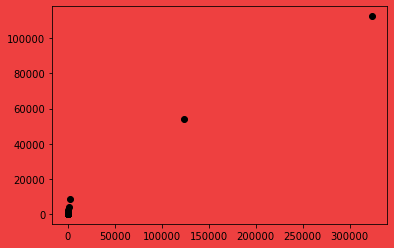

In [7]:
import matplotlib.pyplot as plt

color = 'black'
bg_color = '#EE4040'

with plt.rc_context({'axes.edgecolor':color, 'xtick.color':color, 'ytick.color':color, 'figure.facecolor':bg_color, 'axes.facecolor':bg_color}):
    plt.scatter(vt.variances_, skb.scores_, color=color)

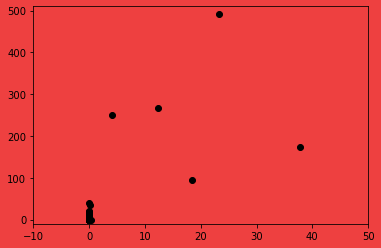

In [8]:
color = 'black'
bg_color = '#EE4040'

with plt.rc_context({'axes.edgecolor':color, 'xtick.color':color, 'ytick.color':color, 'figure.facecolor':bg_color, 'axes.facecolor':bg_color}):
    plt.scatter(vt.variances_, skb.scores_, color=color)
    plt.xlim(-10, 50)
    plt.ylim(-10, 510)

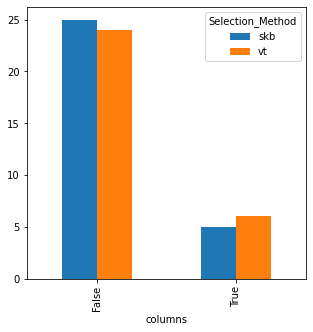

In [9]:
results = vt.get_support(indices=False).tolist() + skb.get_support(indices=False).tolist()
size = len(vt.variances_)
methods = ["vt"]*size + ["skb"]*size

df = pd.DataFrame({"Selection_Method":methods,
                 "columns":results})

col_categorical_1 = "columns"
col_categorical_2 = "Selection_Method"
ct_abs_1 = pd.crosstab(index=df[col_categorical_1], 
                            columns=df[col_categorical_2]) 

ct_abs_1.plot(kind="bar",
              figsize=(5,5),
              stacked=False);

-----------------------------------------
## Aufgabe 2 (14 Punkte)

### 2.1 (4 Punkte)
Worin bestehen die entscheidenden beiden Unterschiede zwischen einer Verringerung der Dimensionalität eines Datensatzes mittels Feature-Selektion (Filter-Methode) und einer Dimensionsreduktion mit einer Methode wie der PCA? 

Beide gehören zum Feature-Engineering, aber es gibt einen Entscheidenden Unterschied. <br>
Bei der Feature-Selection lässt man bestimmte Features weg. Welche das dann sein werden, bestimmt die jeweilige Methode. <br>
Widerum bei der Dimensionsreduktion, werden aus mehreren Features neue Features konstruiert. Man lässt sie also nicht einfach weg, sondern fasst sie zusammen.<br>
Und damit wäre die Frage auch schon beantwortet.

### 2.2 (10 Punkte)
Im vorletzten Übungsblatt hatten wir die Dimensionsreduktions-Technik PCA eingesetzt und beobachtet, wie sich die Accuracy-Scores der Klassifikation bei einer schrittweisen Verringerung der Dimensionalität verändern. Die entsprechenden Werte sehen Sie nochmals unten in der Tabelle. Das gleiche Experiment wurde nun mit den Feature-Selektions-Methoden ``SelectKBest`` sowie ``SequentialFeatureSelector`` wiederholt. Auch diese Ergebnisse stehen unten in der Tabelle. (Zur Erinnerung: Bei ``SelectKBest`` handelt es sich um die oben getestete Filter-Methode. Der ``SequentialFeatureSelector`` gehört zu den sogenannten Wrapper-Methoden, d.h. es wird jeweils mit den selektierten Features ein Modell trainiert und basierend darauf wird entschieden, welche Features erhalten bleiben sollten. Die Selektion kann in 2 Varianten (forward und backward selection) durchgeführt werden. Details siehe Vorlesungsfolien.)

Anmerkungen zur Tabelle: 
* Es wird jeweils die durchschnittliche Accuracy der Kreuzvalidierung (cross-validation) angegeben. 
* Als Klassifikator wurde jeweils eine SVM verwendet. 
* Als Klassifikator für die Feature-Selektion im ``SequentialFeatureSelector`` wurde ein DecisionTree verwendet.
* Die Daten wurden vorher mit einem StandardScaler skaliert. 
* SFS = SequentialFeatureSelector.



**Ihre Aufgabe:**  
**1. Schreiben Sie Ihre Beobachtungen auf.**  
**2. Interpretieren Sie die Ergebnisse.**

#### Ergebnistabelle: 

| \# Dims |  PCA   | SelectKBest | SFS (forward) | SFS (backward) |
|:-------:|------------------:|---------------:|---------------:|---------------:|
| 25      | 0.974 | 0.974 | 0.975 | 0.979 |
| 20      | 0.975 | 0.967 | 0.963 | 0.967 |
| 15      | 0.977 | 0.951 | 0.952 | 0.961 |
| 10      | 0.977 | 0.942 | 0.967 | 0.961 |
|  5      | 0.972 | 0.937 | 0.953 | 0.951 |
|  2      | 0.953 | 0.919 | 0.937 | 0.928 |
|  1      | 0.914 | 0.917 | 0.898 | 0.896 |

**Beobachtungen:**  
Generell nimmt die Accuracy bei allen Selektions/Dimensionreduktions-Arten ab. Die Accuracy bei SelectKBest fällt zunächst am schnellsten. Hält sich dann bei wenigen Features aber recht gut. <br>
Die Accuracy des PCA sinkt vergleichweise am langsamsten und "verliert" bei der Reduzierung zu einer Dimension recht viel Accuracy. Außerdem erreicht die Accuracy bei der 10/15 Dimension die beste Accuracy.<br>
Das Verhalten der Accuracies mit Feature-Selection der SFS Forward und SFS Backward sind sich sehr ähnlich. Die Accuracies sinken vergleichsweise am weitesten.<br>

**Interpretation:**  
Da die beiden SFS-Algorithmen am schlechtesten Abschneiden, ist davon auszugehen, dass die Features eher numerisch sind, da der Decision Tree numerische Feature schlechter trennen kann als kategorische.<br>
Durch die Ergebnisse des PCA's, gehe ich davon aus, das etwa 10 Features existieren, welche man gut zusammenfassen kann. Die restlichen nicht mehr so gut.<br>
<br>
Bei SVM ist eine Dimensionsreduktion bzw. eine Featureselektion nicht immer von Vorteil. Da dabei eventuell wichtige Informationen verloren gehen können. Es kann also sein, dass die Features nur wenig Korrelation haben und nicht "gut" reduzierbar/selektierbar sind. Alle/viele Feratures könnten hier also brauchbare Informationen liefern.<br>
Zudem kann der SVM recht gut mit vielen Features umgehen. Damit wären die Ergbnisse der Selektion/Reduktion auf jedenfall besser, aber besser als mit mehr Dimensionen müsste noch evaluiert werden.

---------------------------
## Aufgabe 3 (optional)

Verwenden Sie nun den ``SequentialFeatureSelector`` von scikit-learn (Wrapper-Methode).
Wenden Sie diesen 4x auf den Daten an. 

1. Mit einem ``DecisionTreeClassifier`` und forward selection 
2. Mit einem ``DecisionTreeClassifier`` und backward selection 
3. Mit einem ``KNeighborsClassifier`` und forward selection 
4. Mit einem ``KNeighborsClassifier`` und backward selection 

Setzen Sie den Parameter ``n_features_to_select`` auf 10. Vergleichen Sie die Ergebnisse (d.h. die selektierten Features) der verschiedenen Aufrufe. Vergleichen Sie die Feature-Auswahl auch mit dem Ergebnis aus Aufgabe 1.




In [10]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(n_neighbors=3), DecisionTreeClassifier(criterion='gini'), DecisionTreeClassifier(criterion='gini')]
results = []
columns = []

for i in range(4):
    if i%2 == 0:
        sfs = SequentialFeatureSelector(models[i], n_features_to_select=10, direction="forward")
        sfs.fit(X, y)
        results += [sfs.get_support(indices=False)]
        columns += [sfs.get_support(indices=True)]
    else:
        sfs = SequentialFeatureSelector(models[i], n_features_to_select=10, direction="backward")
        sfs.fit(X, y)
        results += [sfs.get_support(indices=False)]
        columns += [sfs.get_support(indices=True)]
    
print(results)

[array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False]), array([False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True,  True,  True]), array([False, False, False, False,  True, False,  True, False, False,
       False,  True,  True, False, False, False, False,  True, False,
       False,  True,  True,  True, False, False, False,  True, False,
        True, False, False]), array([False, False, False, False, False,  True, False, False,  True,
       False, False, False,  True, False, False, False,  True, False,
       False,  True,  True,  True, False,  True, False,  True, False,
        True, False, False])]


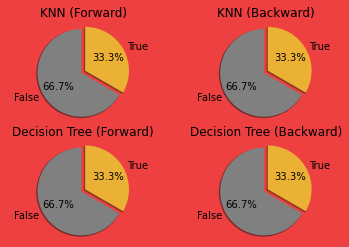

In [11]:
color = 'black'
bg_color = '#EE4040'

with plt.rc_context({'axes.edgecolor':color, 'xtick.color':color, 'ytick.color':color, 'figure.facecolor':bg_color, 'axes.facecolor':bg_color}):
    #plt.scatter(vt.variances_, skb.scores_, color=color)
    #plt.xlim(-10, 50)
    #plt.ylim(-10, 510)

    fig, axs = plt.subplots(2, 2)
    # 1. Figure
    df = pd.DataFrame({"results":results[0]})
    my_col_categ = "results"
    freq_table_1 = pd.concat([
        df[my_col_categ].value_counts(dropna=False),
        df[my_col_categ].value_counts(normalize=True, dropna=False),  
        df[my_col_categ].value_counts(normalize=True, dropna=False).mul(100).round(1).astype(str) + '%'],     
        axis=1,
        keys=('Count','Prop', 'Percentage')) 
    freq_table_1.sort_index(inplace=True)  
    labels = 'False', 'True'       
    sizes = freq_table_1["Prop"]   
    explode = (0, 0.1)          

    axs[0,0].pie(sizes, 
            explode=explode, 
            labels=labels, 
            autopct='%1.1f%%',
            shadow=True, 
            startangle=90,
            colors=["grey", "#ebb134"])
    axs[0,0].axis('equal') 
    axs[0, 0].set_title('KNN (Forward)')
    
    # 2. Figure
    df = pd.DataFrame({"results":results[1]})
    my_col_categ = "results"
    freq_table_1 = pd.concat([
        df[my_col_categ].value_counts(dropna=False),
        df[my_col_categ].value_counts(normalize=True, dropna=False),  
        df[my_col_categ].value_counts(normalize=True, dropna=False).mul(100).round(1).astype(str) + '%'],     
        axis=1,
        keys=('Count','Prop', 'Percentage')) 
    freq_table_1.sort_index(inplace=True)  
    labels = 'False', 'True'       
    sizes = freq_table_1["Prop"]   
    explode = (0, 0.1)          

    axs[0,1].pie(sizes, 
            explode=explode, 
            labels=labels, 
            autopct='%1.1f%%',
            shadow=True, 
            startangle=90,
            colors=["grey", "#ebb134"])
    axs[0,1].axis('equal') 
    axs[0,1].set_title('KNN (Backward)')
    
    # 3. Figure
    df = pd.DataFrame({"results":results[2]})
    my_col_categ = "results"
    freq_table_1 = pd.concat([
        df[my_col_categ].value_counts(dropna=False),
        df[my_col_categ].value_counts(normalize=True, dropna=False),  
        df[my_col_categ].value_counts(normalize=True, dropna=False).mul(100).round(1).astype(str) + '%'],     
        axis=1,
        keys=('Count','Prop', 'Percentage')) 
    freq_table_1.sort_index(inplace=True)  
    labels = 'False', 'True'       
    sizes = freq_table_1["Prop"]   
    explode = (0, 0.1)          

    axs[1,0].pie(sizes, 
            explode=explode, 
            labels=labels, 
            autopct='%1.1f%%',
            shadow=True, 
            startangle=90,
            colors=["grey", "#ebb134"])
    axs[1,0].axis('equal') 
    axs[1, 0].set_title('Decision Tree (Forward)')
    
    # 4. Figure
    df = pd.DataFrame({"results":results[3]})
    my_col_categ = "results"
    freq_table_1 = pd.concat([
        df[my_col_categ].value_counts(dropna=False),
        df[my_col_categ].value_counts(normalize=True, dropna=False),  
        df[my_col_categ].value_counts(normalize=True, dropna=False).mul(100).round(1).astype(str) + '%'],     
        axis=1,
        keys=('Count','Prop', 'Percentage')) 
    freq_table_1.sort_index(inplace=True)  
    labels = 'False', 'True'       
    sizes = freq_table_1["Prop"]   
    explode = (0, 0.1)          

    axs[1,1].pie(sizes, 
            explode=explode, 
            labels=labels, 
            autopct='%1.1f%%',
            shadow=True, 
            startangle=90,
            colors=["grey", "#ebb134"])
    axs[1,1].axis('equal') 
    axs[1, 1].set_title('Decision Tree (Backward)')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()

Es wurden immer die selbe Anzahl an Features gewählt, aber die gwählten Features an sich sind unterschiedlich. <br>
(das liegt an dem Parameter n_features_to_select)

-> Deswegen hier die Features, welche rausgeworfen wurden im Vergleich:

In [12]:
selected_cols =  [X.iloc[:, columns[0]].columns, X.iloc[:, columns[1]].columns, X.iloc[:, columns[2]].columns, X.iloc[:, columns[3]].columns]
txt = "x = removed\nnothing = still there\n\n\nKNN(Forward)    KNN(Backward)    DecisionTree(Forward)    DecisionTree(Backward)    Columns\n"
for c in X.columns:
    if c in selected_cols[0]:
        txt += "     " + "  " + "                "
    else:
        txt += "     " + "x " + "                "
    if c in selected_cols[1]:
        txt += "  " + "                  "
    else:
        txt += "x " + "                  "
    
    if c in selected_cols[2]:
        txt += "  " + "                      "
    else:  
        txt += "x " + "                      "
        
    if c in selected_cols[3]:
        txt += "  " + "              "
    else:
        txt += "x " + "              "
        
    txt += c+"\n"
    txt += "\n__________________________________________________________________________________________________\n".replace("_", "-")
    
print(txt)

x = removed
nothing = still there


KNN(Forward)    KNN(Backward)    DecisionTree(Forward)    DecisionTree(Backward)    Columns
                       x                   x                       x               mean radius

--------------------------------------------------------------------------------------------------
                       x                   x                       x               mean texture

--------------------------------------------------------------------------------------------------
                                           x                       x               mean perimeter

--------------------------------------------------------------------------------------------------
                       x                   x                       x               mean area

--------------------------------------------------------------------------------------------------
                       x                                           x               mean sm